In [1]:
import argparse as ap
import cv2
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *
from sklearn import preprocessing
import math

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
class Struct():
    def __init__(self):
        pass
args = Struct()
args.trainset_path='/share/dong/Data/OxfordBuilding/images/'

In [3]:
# Get the training classes names and store them in a list
train_path = args.trainset_path
training_names = os.listdir(train_path)
numWords = 128 
# Get all the path to the images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
for training_name in training_names:
    image_path = os.path.join(train_path, training_name)
    image_paths += [image_path]

In [4]:
# Create feature extraction and keypoint detector objects
sift = cv2.xfeatures2d.SIFT_create()
# List where all the descriptors are stored
des_list = []

for i, image_path in enumerate(image_paths):
    im = cv2.imread(image_path)
    print("Extract SIFT of %s image, %d of %d images" %(training_names[i], i, len(image_paths)))
    kpts = sift.detect(im)
    kpts, des = sift.compute(im, kpts)
    #some process for this picture:shmolean_000214.jpg
    if des is None :
        print("descriptors is None at %s"%(image_path))
        print("Try to creat sift again")
        tmp_sift = cv2.xfeatures2d.SIFT_create()
        kpts = tmp_sift.detect(im)
        kpts, des = tmp_sift.compute(im, kpts) 
        if des is None:
            print("It doesn't work, use zeros instead")
            des = np.asarray([[0]*128])
            des_list.append((image_path, des))
        else:
            print("It works,happy!")
            des_list.append((image_path, des))
    else:
        des_list.append((image_path, des))

Extract SIFT of oxford_002403.jpg image, 0 of 5063 images
Extract SIFT of new_000282.jpg image, 1 of 5063 images
Extract SIFT of oxford_002924.jpg image, 2 of 5063 images
Extract SIFT of balliol_000024.jpg image, 3 of 5063 images
Extract SIFT of oxford_001461.jpg image, 4 of 5063 images
Extract SIFT of magdalen_000153.jpg image, 5 of 5063 images
Extract SIFT of christ_church_000829.jpg image, 6 of 5063 images
Extract SIFT of radcliffe_camera_000390.jpg image, 7 of 5063 images
Extract SIFT of oxford_003500.jpg image, 8 of 5063 images
Extract SIFT of bodleian_000060.jpg image, 9 of 5063 images
Extract SIFT of ashmolean_000261.jpg image, 10 of 5063 images
Extract SIFT of oxford_002200.jpg image, 11 of 5063 images
Extract SIFT of keble_000025.jpg image, 12 of 5063 images
Extract SIFT of oxford_002841.jpg image, 13 of 5063 images
Extract SIFT of keble_000028.jpg image, 14 of 5063 images
Extract SIFT of oxford_001052.jpg image, 15 of 5063 images
Extract SIFT of oxford_002396.jpg image, 16 of

Extract SIFT of new_000365.jpg image, 137 of 5063 images
Extract SIFT of oxford_001434.jpg image, 138 of 5063 images
Extract SIFT of balliol_000027.jpg image, 139 of 5063 images
Extract SIFT of magdalen_001142.jpg image, 140 of 5063 images
Extract SIFT of christ_church_000062.jpg image, 141 of 5063 images
Extract SIFT of oxford_000435.jpg image, 142 of 5063 images
Extract SIFT of oxford_001851.jpg image, 143 of 5063 images
Extract SIFT of trinity_000300.jpg image, 144 of 5063 images
Extract SIFT of oxford_002016.jpg image, 145 of 5063 images
Extract SIFT of cornmarket_000025.jpg image, 146 of 5063 images
Extract SIFT of radcliffe_camera_000042.jpg image, 147 of 5063 images
Extract SIFT of oxford_003271.jpg image, 148 of 5063 images
Extract SIFT of oxford_001204.jpg image, 149 of 5063 images
Extract SIFT of oxford_003647.jpg image, 150 of 5063 images
Extract SIFT of worcester_000176.jpg image, 151 of 5063 images
Extract SIFT of christ_church_000372.jpg image, 152 of 5063 images
Extract 

Extract SIFT of all_souls_000186.jpg image, 269 of 5063 images
Extract SIFT of cornmarket_000033.jpg image, 270 of 5063 images
Extract SIFT of balliol_000196.jpg image, 271 of 5063 images
Extract SIFT of magdalen_000110.jpg image, 272 of 5063 images
Extract SIFT of christ_church_000667.jpg image, 273 of 5063 images
Extract SIFT of trinity_000278.jpg image, 274 of 5063 images
Extract SIFT of keble_000047.jpg image, 275 of 5063 images
Extract SIFT of oxford_003306.jpg image, 276 of 5063 images
Extract SIFT of pitt_rivers_000112.jpg image, 277 of 5063 images
Extract SIFT of christ_church_000630.jpg image, 278 of 5063 images
Extract SIFT of radcliffe_camera_000522.jpg image, 279 of 5063 images
Extract SIFT of oriel_000087.jpg image, 280 of 5063 images
Extract SIFT of new_000377.jpg image, 281 of 5063 images
Extract SIFT of bodleian_000037.jpg image, 282 of 5063 images
Extract SIFT of balliol_000115.jpg image, 283 of 5063 images
Extract SIFT of christ_church_000379.jpg image, 284 of 5063 im

Extract SIFT of christ_church_000998.jpg image, 401 of 5063 images
Extract SIFT of radcliffe_camera_000412.jpg image, 402 of 5063 images
Extract SIFT of oriel_000066.jpg image, 403 of 5063 images
Extract SIFT of oxford_001354.jpg image, 404 of 5063 images
Extract SIFT of oxford_003596.jpg image, 405 of 5063 images
Extract SIFT of oxford_000693.jpg image, 406 of 5063 images
Extract SIFT of jesus_000122.jpg image, 407 of 5063 images
Extract SIFT of magdalen_001094.jpg image, 408 of 5063 images
Extract SIFT of oxford_001946.jpg image, 409 of 5063 images
Extract SIFT of all_souls_000180.jpg image, 410 of 5063 images
Extract SIFT of christ_church_000989.jpg image, 411 of 5063 images
Extract SIFT of magdalen_000164.jpg image, 412 of 5063 images
Extract SIFT of oxford_003094.jpg image, 413 of 5063 images
Extract SIFT of magdalen_000468.jpg image, 414 of 5063 images
Extract SIFT of christ_church_000709.jpg image, 415 of 5063 images
Extract SIFT of magdalen_000710.jpg image, 416 of 5063 images


Extract SIFT of hertford_000111.jpg image, 534 of 5063 images
Extract SIFT of jesus_000282.jpg image, 535 of 5063 images
Extract SIFT of new_000961.jpg image, 536 of 5063 images
Extract SIFT of oriel_000081.jpg image, 537 of 5063 images
Extract SIFT of jesus_000329.jpg image, 538 of 5063 images
Extract SIFT of jesus_000002.jpg image, 539 of 5063 images
Extract SIFT of oxford_000006.jpg image, 540 of 5063 images
Extract SIFT of magdalen_000200.jpg image, 541 of 5063 images
Extract SIFT of pitt_rivers_000004.jpg image, 542 of 5063 images
Extract SIFT of trinity_000129.jpg image, 543 of 5063 images
Extract SIFT of worcester_000001.jpg image, 544 of 5063 images
Extract SIFT of balliol_000055.jpg image, 545 of 5063 images
Extract SIFT of pitt_rivers_000074.jpg image, 546 of 5063 images
Extract SIFT of oxford_001953.jpg image, 547 of 5063 images
Extract SIFT of radcliffe_camera_000249.jpg image, 548 of 5063 images
Extract SIFT of magdalen_001073.jpg image, 549 of 5063 images
Extract SIFT of 

Extract SIFT of magdalen_000245.jpg image, 667 of 5063 images
Extract SIFT of christ_church_000316.jpg image, 668 of 5063 images
Extract SIFT of magdalen_000591.jpg image, 669 of 5063 images
Extract SIFT of magdalen_000527.jpg image, 670 of 5063 images
Extract SIFT of oxford_002172.jpg image, 671 of 5063 images
Extract SIFT of radcliffe_camera_000324.jpg image, 672 of 5063 images
Extract SIFT of radcliffe_camera_000512.jpg image, 673 of 5063 images
Extract SIFT of cornmarket_000061.jpg image, 674 of 5063 images
Extract SIFT of bodleian_000150.jpg image, 675 of 5063 images
Extract SIFT of oxford_003032.jpg image, 676 of 5063 images
Extract SIFT of oxford_003079.jpg image, 677 of 5063 images
Extract SIFT of oxford_001150.jpg image, 678 of 5063 images
Extract SIFT of all_souls_000060.jpg image, 679 of 5063 images
Extract SIFT of new_000462.jpg image, 680 of 5063 images
Extract SIFT of radcliffe_camera_000232.jpg image, 681 of 5063 images
Extract SIFT of oxford_001906.jpg image, 682 of 506

Extract SIFT of christ_church_000892.jpg image, 800 of 5063 images
Extract SIFT of cornmarket_000039.jpg image, 801 of 5063 images
Extract SIFT of oxford_002142.jpg image, 802 of 5063 images
Extract SIFT of oxford_003510.jpg image, 803 of 5063 images
Extract SIFT of oxford_001861.jpg image, 804 of 5063 images
Extract SIFT of new_000227.jpg image, 805 of 5063 images
Extract SIFT of ashmolean_000228.jpg image, 806 of 5063 images
Extract SIFT of bodleian_000430.jpg image, 807 of 5063 images
Extract SIFT of oxford_001048.jpg image, 808 of 5063 images
Extract SIFT of ashmolean_000222.jpg image, 809 of 5063 images
Extract SIFT of oxford_001216.jpg image, 810 of 5063 images
Extract SIFT of cornmarket_000093.jpg image, 811 of 5063 images
Extract SIFT of christ_church_001032.jpg image, 812 of 5063 images
Extract SIFT of oxford_001406.jpg image, 813 of 5063 images
Extract SIFT of new_000984.jpg image, 814 of 5063 images
Extract SIFT of oxford_002157.jpg image, 815 of 5063 images
Extract SIFT of 

Extract SIFT of oxford_000546.jpg image, 933 of 5063 images
Extract SIFT of new_000839.jpg image, 934 of 5063 images
Extract SIFT of magdalen_000159.jpg image, 935 of 5063 images
Extract SIFT of trinity_000337.jpg image, 936 of 5063 images
Extract SIFT of oxford_000259.jpg image, 937 of 5063 images
Extract SIFT of oxford_000734.jpg image, 938 of 5063 images
Extract SIFT of new_000242.jpg image, 939 of 5063 images
Extract SIFT of christ_church_001034.jpg image, 940 of 5063 images
Extract SIFT of oxford_002511.jpg image, 941 of 5063 images
Extract SIFT of trinity_000079.jpg image, 942 of 5063 images
Extract SIFT of pitt_rivers_000005.jpg image, 943 of 5063 images
Extract SIFT of ashmolean_000224.jpg image, 944 of 5063 images
Extract SIFT of trinity_000114.jpg image, 945 of 5063 images
Extract SIFT of oriel_000033.jpg image, 946 of 5063 images
Extract SIFT of all_souls_000051.jpg image, 947 of 5063 images
Extract SIFT of keble_000209.jpg image, 948 of 5063 images
Extract SIFT of christ_ch

Extract SIFT of ashmolean_000278.jpg image, 1066 of 5063 images
Extract SIFT of oxford_001173.jpg image, 1067 of 5063 images
Extract SIFT of jesus_000330.jpg image, 1068 of 5063 images
Extract SIFT of oxford_002283.jpg image, 1069 of 5063 images
Extract SIFT of radcliffe_camera_000218.jpg image, 1070 of 5063 images
Extract SIFT of keble_000059.jpg image, 1071 of 5063 images
Extract SIFT of bodleian_000095.jpg image, 1072 of 5063 images
Extract SIFT of balliol_000116.jpg image, 1073 of 5063 images
Extract SIFT of bodleian_000207.jpg image, 1074 of 5063 images
Extract SIFT of trinity_000063.jpg image, 1075 of 5063 images
Extract SIFT of new_000800.jpg image, 1076 of 5063 images
Extract SIFT of all_souls_000152.jpg image, 1077 of 5063 images
Extract SIFT of christ_church_001013.jpg image, 1078 of 5063 images
Extract SIFT of new_000170.jpg image, 1079 of 5063 images
Extract SIFT of oxford_001931.jpg image, 1080 of 5063 images
Extract SIFT of new_000866.jpg image, 1081 of 5063 images
Extrac

Extract SIFT of magdalen_000073.jpg image, 1197 of 5063 images
Extract SIFT of magdalen_000437.jpg image, 1198 of 5063 images
Extract SIFT of new_000825.jpg image, 1199 of 5063 images
Extract SIFT of pitt_rivers_000042.jpg image, 1200 of 5063 images
Extract SIFT of new_001063.jpg image, 1201 of 5063 images
Extract SIFT of christ_church_000045.jpg image, 1202 of 5063 images
Extract SIFT of keble_000036.jpg image, 1203 of 5063 images
Extract SIFT of radcliffe_camera_000215.jpg image, 1204 of 5063 images
Extract SIFT of oxford_002733.jpg image, 1205 of 5063 images
Extract SIFT of all_souls_000150.jpg image, 1206 of 5063 images
Extract SIFT of ashmolean_000083.jpg image, 1207 of 5063 images
Extract SIFT of oxford_000568.jpg image, 1208 of 5063 images
Extract SIFT of new_000951.jpg image, 1209 of 5063 images
Extract SIFT of christ_church_000369.jpg image, 1210 of 5063 images
Extract SIFT of oriel_000003.jpg image, 1211 of 5063 images
Extract SIFT of christ_church_000131.jpg image, 1212 of 5

Extract SIFT of trinity_000382.jpg image, 1330 of 5063 images
Extract SIFT of oxford_002217.jpg image, 1331 of 5063 images
Extract SIFT of trinity_000174.jpg image, 1332 of 5063 images
Extract SIFT of oxford_000133.jpg image, 1333 of 5063 images
Extract SIFT of oriel_000062.jpg image, 1334 of 5063 images
Extract SIFT of bodleian_000388.jpg image, 1335 of 5063 images
Extract SIFT of oriel_000067.jpg image, 1336 of 5063 images
Extract SIFT of oxford_002424.jpg image, 1337 of 5063 images
Extract SIFT of jesus_000026.jpg image, 1338 of 5063 images
Extract SIFT of oxford_002411.jpg image, 1339 of 5063 images
Extract SIFT of christ_church_000143.jpg image, 1340 of 5063 images
Extract SIFT of oxford_000601.jpg image, 1341 of 5063 images
Extract SIFT of oxford_000032.jpg image, 1342 of 5063 images
Extract SIFT of balliol_000065.jpg image, 1343 of 5063 images
Extract SIFT of worcester_000061.jpg image, 1344 of 5063 images
Extract SIFT of oxford_001802.jpg image, 1345 of 5063 images
Extract SIFT

Extract SIFT of all_souls_000207.jpg image, 1462 of 5063 images
Extract SIFT of oxford_002577.jpg image, 1463 of 5063 images
Extract SIFT of magdalen_000313.jpg image, 1464 of 5063 images
Extract SIFT of ashmolean_000245.jpg image, 1465 of 5063 images
Extract SIFT of christ_church_000443.jpg image, 1466 of 5063 images
Extract SIFT of magdalen_000039.jpg image, 1467 of 5063 images
Extract SIFT of pitt_rivers_000127.jpg image, 1468 of 5063 images
Extract SIFT of magdalen_000973.jpg image, 1469 of 5063 images
Extract SIFT of new_000289.jpg image, 1470 of 5063 images
Extract SIFT of magdalen_000826.jpg image, 1471 of 5063 images
Extract SIFT of magdalen_000843.jpg image, 1472 of 5063 images
Extract SIFT of ashmolean_000107.jpg image, 1473 of 5063 images
Extract SIFT of oxford_001667.jpg image, 1474 of 5063 images
Extract SIFT of oxford_002509.jpg image, 1475 of 5063 images
Extract SIFT of magdalen_001056.jpg image, 1476 of 5063 images
Extract SIFT of oxford_000809.jpg image, 1477 of 5063 i

Extract SIFT of oxford_000974.jpg image, 1593 of 5063 images
Extract SIFT of oxford_002428.jpg image, 1594 of 5063 images
Extract SIFT of radcliffe_camera_000266.jpg image, 1595 of 5063 images
Extract SIFT of oxford_000900.jpg image, 1596 of 5063 images
Extract SIFT of balliol_000135.jpg image, 1597 of 5063 images
Extract SIFT of oxford_003282.jpg image, 1598 of 5063 images
Extract SIFT of radcliffe_camera_000114.jpg image, 1599 of 5063 images
Extract SIFT of oxford_001717.jpg image, 1600 of 5063 images
Extract SIFT of magdalen_000302.jpg image, 1601 of 5063 images
Extract SIFT of trinity_000289.jpg image, 1602 of 5063 images
Extract SIFT of all_souls_000219.jpg image, 1603 of 5063 images
Extract SIFT of new_000853.jpg image, 1604 of 5063 images
Extract SIFT of hertford_000015.jpg image, 1605 of 5063 images
Extract SIFT of magdalen_000704.jpg image, 1606 of 5063 images
Extract SIFT of oxford_001118.jpg image, 1607 of 5063 images
Extract SIFT of oxford_003142.jpg image, 1608 of 5063 ima

Extract SIFT of new_000389.jpg image, 1724 of 5063 images
Extract SIFT of new_000477.jpg image, 1725 of 5063 images
Extract SIFT of cornmarket_000071.jpg image, 1726 of 5063 images
Extract SIFT of jesus_000308.jpg image, 1727 of 5063 images
Extract SIFT of jesus_000381.jpg image, 1728 of 5063 images
Extract SIFT of pitt_rivers_000016.jpg image, 1729 of 5063 images
Extract SIFT of trinity_000087.jpg image, 1730 of 5063 images
Extract SIFT of magdalen_001037.jpg image, 1731 of 5063 images
Extract SIFT of christ_church_000093.jpg image, 1732 of 5063 images
Extract SIFT of new_001090.jpg image, 1733 of 5063 images
Extract SIFT of oxford_002728.jpg image, 1734 of 5063 images
Extract SIFT of hertford_000109.jpg image, 1735 of 5063 images
Extract SIFT of magdalen_000954.jpg image, 1736 of 5063 images
Extract SIFT of oxford_001483.jpg image, 1737 of 5063 images
Extract SIFT of magdalen_000212.jpg image, 1738 of 5063 images
Extract SIFT of magdalen_000311.jpg image, 1739 of 5063 images
Extract 

Extract SIFT of christ_church_000958.jpg image, 1857 of 5063 images
Extract SIFT of magdalen_000134.jpg image, 1858 of 5063 images
Extract SIFT of oxford_001928.jpg image, 1859 of 5063 images
Extract SIFT of new_000388.jpg image, 1860 of 5063 images
Extract SIFT of oxford_003225.jpg image, 1861 of 5063 images
Extract SIFT of magdalen_000811.jpg image, 1862 of 5063 images
Extract SIFT of radcliffe_camera_000027.jpg image, 1863 of 5063 images
Extract SIFT of oxford_001328.jpg image, 1864 of 5063 images
Extract SIFT of magdalen_000299.jpg image, 1865 of 5063 images
Extract SIFT of ashmolean_000304.jpg image, 1866 of 5063 images
Extract SIFT of new_000370.jpg image, 1867 of 5063 images
Extract SIFT of christ_church_000977.jpg image, 1868 of 5063 images
Extract SIFT of jesus_000306.jpg image, 1869 of 5063 images
Extract SIFT of magdalen_000761.jpg image, 1870 of 5063 images
Extract SIFT of oxford_000699.jpg image, 1871 of 5063 images
Extract SIFT of magdalen_000530.jpg image, 1872 of 5063 i

Extract SIFT of radcliffe_camera_000128.jpg image, 1988 of 5063 images
Extract SIFT of oxford_000740.jpg image, 1989 of 5063 images
Extract SIFT of bodleian_000356.jpg image, 1990 of 5063 images
Extract SIFT of magdalen_000696.jpg image, 1991 of 5063 images
Extract SIFT of magdalen_000680.jpg image, 1992 of 5063 images
Extract SIFT of oxford_000051.jpg image, 1993 of 5063 images
Extract SIFT of new_000962.jpg image, 1994 of 5063 images
Extract SIFT of new_001029.jpg image, 1995 of 5063 images
Extract SIFT of magdalen_001072.jpg image, 1996 of 5063 images
Extract SIFT of magdalen_000201.jpg image, 1997 of 5063 images
Extract SIFT of magdalen_000596.jpg image, 1998 of 5063 images
Extract SIFT of oxford_003144.jpg image, 1999 of 5063 images
Extract SIFT of magdalen_000258.jpg image, 2000 of 5063 images
Extract SIFT of hertford_000021.jpg image, 2001 of 5063 images
Extract SIFT of oxford_002556.jpg image, 2002 of 5063 images
Extract SIFT of trinity_000119.jpg image, 2003 of 5063 images
Ext

Extract SIFT of magdalen_000526.jpg image, 2119 of 5063 images
Extract SIFT of oriel_000041.jpg image, 2120 of 5063 images
Extract SIFT of oxford_000858.jpg image, 2121 of 5063 images
Extract SIFT of new_000909.jpg image, 2122 of 5063 images
Extract SIFT of balliol_000197.jpg image, 2123 of 5063 images
Extract SIFT of ashmolean_000303.jpg image, 2124 of 5063 images
Extract SIFT of magdalen_000290.jpg image, 2125 of 5063 images
Extract SIFT of ashmolean_000301.jpg image, 2126 of 5063 images
Extract SIFT of new_000134.jpg image, 2127 of 5063 images
Extract SIFT of new_000738.jpg image, 2128 of 5063 images
Extract SIFT of balliol_000202.jpg image, 2129 of 5063 images
Extract SIFT of pitt_rivers_000035.jpg image, 2130 of 5063 images
Extract SIFT of trinity_000166.jpg image, 2131 of 5063 images
Extract SIFT of oxford_001268.jpg image, 2132 of 5063 images
Extract SIFT of pitt_rivers_000189.jpg image, 2133 of 5063 images
Extract SIFT of bodleian_000434.jpg image, 2134 of 5063 images
Extract S

Extract SIFT of oxford_000422.jpg image, 2251 of 5063 images
Extract SIFT of christ_church_000803.jpg image, 2252 of 5063 images
Extract SIFT of oriel_000005.jpg image, 2253 of 5063 images
Extract SIFT of jesus_000013.jpg image, 2254 of 5063 images
Extract SIFT of oxford_000685.jpg image, 2255 of 5063 images
Extract SIFT of ashmolean_000065.jpg image, 2256 of 5063 images
Extract SIFT of oxford_002506.jpg image, 2257 of 5063 images
Extract SIFT of magdalen_000979.jpg image, 2258 of 5063 images
Extract SIFT of magdalen_000509.jpg image, 2259 of 5063 images
Extract SIFT of magdalen_000277.jpg image, 2260 of 5063 images
Extract SIFT of oxford_002010.jpg image, 2261 of 5063 images
Extract SIFT of oxford_001491.jpg image, 2262 of 5063 images
Extract SIFT of oxford_002554.jpg image, 2263 of 5063 images
Extract SIFT of magdalen_000713.jpg image, 2264 of 5063 images
Extract SIFT of new_000466.jpg image, 2265 of 5063 images
Extract SIFT of oxford_000903.jpg image, 2266 of 5063 images
Extract SIF

Extract SIFT of new_000900.jpg image, 2382 of 5063 images
Extract SIFT of trinity_000281.jpg image, 2383 of 5063 images
Extract SIFT of balliol_000120.jpg image, 2384 of 5063 images
Extract SIFT of oxford_002710.jpg image, 2385 of 5063 images
Extract SIFT of keble_000251.jpg image, 2386 of 5063 images
Extract SIFT of ashmolean_000066.jpg image, 2387 of 5063 images
Extract SIFT of all_souls_000075.jpg image, 2388 of 5063 images
Extract SIFT of christ_church_000312.jpg image, 2389 of 5063 images
Extract SIFT of oxford_003477.jpg image, 2390 of 5063 images
Extract SIFT of magdalen_000009.jpg image, 2391 of 5063 images
Extract SIFT of oxford_002889.jpg image, 2392 of 5063 images
Extract SIFT of oxford_002461.jpg image, 2393 of 5063 images
Extract SIFT of trinity_000134.jpg image, 2394 of 5063 images
Extract SIFT of oxford_001265.jpg image, 2395 of 5063 images
Extract SIFT of oxford_002948.jpg image, 2396 of 5063 images
Extract SIFT of bodleian_000364.jpg image, 2397 of 5063 images
Extract 

Extract SIFT of radcliffe_camera_000360.jpg image, 2512 of 5063 images
Extract SIFT of magdalen_000308.jpg image, 2513 of 5063 images
Extract SIFT of new_000456.jpg image, 2514 of 5063 images
Extract SIFT of trinity_000138.jpg image, 2515 of 5063 images
Extract SIFT of oxford_000236.jpg image, 2516 of 5063 images
Extract SIFT of balliol_000078.jpg image, 2517 of 5063 images
Extract SIFT of christ_church_000728.jpg image, 2518 of 5063 images
Extract SIFT of new_001071.jpg image, 2519 of 5063 images
Extract SIFT of oxford_001350.jpg image, 2520 of 5063 images
Extract SIFT of trinity_000001.jpg image, 2521 of 5063 images
Extract SIFT of balliol_000061.jpg image, 2522 of 5063 images
Extract SIFT of oxford_001512.jpg image, 2523 of 5063 images
Extract SIFT of magdalen_000023.jpg image, 2524 of 5063 images
Extract SIFT of christ_church_000983.jpg image, 2525 of 5063 images
Extract SIFT of christ_church_000310.jpg image, 2526 of 5063 images
Extract SIFT of radcliffe_camera_000172.jpg image, 2

Extract SIFT of oxford_001437.jpg image, 2643 of 5063 images
Extract SIFT of oxford_000074.jpg image, 2644 of 5063 images
Extract SIFT of christ_church_001142.jpg image, 2645 of 5063 images
Extract SIFT of magdalen_000720.jpg image, 2646 of 5063 images
Extract SIFT of oxford_002672.jpg image, 2647 of 5063 images
Extract SIFT of oxford_001998.jpg image, 2648 of 5063 images
Extract SIFT of oriel_000109.jpg image, 2649 of 5063 images
Extract SIFT of new_000372.jpg image, 2650 of 5063 images
Extract SIFT of cornmarket_000124.jpg image, 2651 of 5063 images
Extract SIFT of oxford_002711.jpg image, 2652 of 5063 images
Extract SIFT of oxford_002471.jpg image, 2653 of 5063 images
Extract SIFT of magdalen_000020.jpg image, 2654 of 5063 images
Extract SIFT of new_000199.jpg image, 2655 of 5063 images
Extract SIFT of oxford_003041.jpg image, 2656 of 5063 images
Extract SIFT of oxford_003518.jpg image, 2657 of 5063 images
Extract SIFT of bodleian_000366.jpg image, 2658 of 5063 images
Extract SIFT o

Extract SIFT of radcliffe_camera_000213.jpg image, 2775 of 5063 images
Extract SIFT of oxford_003505.jpg image, 2776 of 5063 images
Extract SIFT of oxford_000626.jpg image, 2777 of 5063 images
Extract SIFT of new_000392.jpg image, 2778 of 5063 images
Extract SIFT of magdalen_000248.jpg image, 2779 of 5063 images
Extract SIFT of trinity_000274.jpg image, 2780 of 5063 images
Extract SIFT of oxford_001063.jpg image, 2781 of 5063 images
Extract SIFT of oxford_000676.jpg image, 2782 of 5063 images
Extract SIFT of trinity_000173.jpg image, 2783 of 5063 images
Extract SIFT of radcliffe_camera_000064.jpg image, 2784 of 5063 images
Extract SIFT of balliol_000111.jpg image, 2785 of 5063 images
Extract SIFT of oxford_001634.jpg image, 2786 of 5063 images
Extract SIFT of bodleian_000348.jpg image, 2787 of 5063 images
Extract SIFT of new_000908.jpg image, 2788 of 5063 images
Extract SIFT of oxford_000815.jpg image, 2789 of 5063 images
Extract SIFT of bodleian_000170.jpg image, 2790 of 5063 images
E

Extract SIFT of magdalen_000748.jpg image, 2907 of 5063 images
Extract SIFT of magdalen_000613.jpg image, 2908 of 5063 images
Extract SIFT of magdalen_000291.jpg image, 2909 of 5063 images
Extract SIFT of bodleian_000424.jpg image, 2910 of 5063 images
Extract SIFT of oxford_001480.jpg image, 2911 of 5063 images
Extract SIFT of christ_church_000120.jpg image, 2912 of 5063 images
Extract SIFT of oxford_000009.jpg image, 2913 of 5063 images
Extract SIFT of magdalen_001002.jpg image, 2914 of 5063 images
Extract SIFT of oxford_000031.jpg image, 2915 of 5063 images
Extract SIFT of magdalen_000792.jpg image, 2916 of 5063 images
Extract SIFT of new_000986.jpg image, 2917 of 5063 images
Extract SIFT of christ_church_000319.jpg image, 2918 of 5063 images
Extract SIFT of oxford_002570.jpg image, 2919 of 5063 images
Extract SIFT of christ_church_000980.jpg image, 2920 of 5063 images
Extract SIFT of magdalen_001013.jpg image, 2921 of 5063 images
Extract SIFT of oxford_002971.jpg image, 2922 of 5063

Extract SIFT of new_000447.jpg image, 3040 of 5063 images
Extract SIFT of oxford_001441.jpg image, 3041 of 5063 images
Extract SIFT of oxford_000590.jpg image, 3042 of 5063 images
Extract SIFT of magdalen_001011.jpg image, 3043 of 5063 images
Extract SIFT of pitt_rivers_000120.jpg image, 3044 of 5063 images
Extract SIFT of oxford_001704.jpg image, 3045 of 5063 images
Extract SIFT of bodleian_000194.jpg image, 3046 of 5063 images
Extract SIFT of oxford_000741.jpg image, 3047 of 5063 images
Extract SIFT of oxford_002778.jpg image, 3048 of 5063 images
Extract SIFT of worcester_000134.jpg image, 3049 of 5063 images
Extract SIFT of worcester_000150.jpg image, 3050 of 5063 images
Extract SIFT of oxford_000076.jpg image, 3051 of 5063 images
Extract SIFT of christ_church_000050.jpg image, 3052 of 5063 images
Extract SIFT of all_souls_000099.jpg image, 3053 of 5063 images
Extract SIFT of magdalen_000386.jpg image, 3054 of 5063 images
Extract SIFT of oxford_000669.jpg image, 3055 of 5063 images


Extract SIFT of jesus_000056.jpg image, 3171 of 5063 images
Extract SIFT of oxford_000137.jpg image, 3172 of 5063 images
Extract SIFT of christ_church_000058.jpg image, 3173 of 5063 images
Extract SIFT of oxford_003450.jpg image, 3174 of 5063 images
Extract SIFT of pitt_rivers_000190.jpg image, 3175 of 5063 images
Extract SIFT of all_souls_000161.jpg image, 3176 of 5063 images
Extract SIFT of balliol_000122.jpg image, 3177 of 5063 images
Extract SIFT of christ_church_000537.jpg image, 3178 of 5063 images
Extract SIFT of ashmolean_000236.jpg image, 3179 of 5063 images
Extract SIFT of magdalen_000045.jpg image, 3180 of 5063 images
Extract SIFT of bodleian_000471.jpg image, 3181 of 5063 images
Extract SIFT of oxford_000726.jpg image, 3182 of 5063 images
Extract SIFT of trinity_000112.jpg image, 3183 of 5063 images
Extract SIFT of oxford_000080.jpg image, 3184 of 5063 images
Extract SIFT of oxford_002134.jpg image, 3185 of 5063 images
Extract SIFT of jesus_000083.jpg image, 3186 of 5063 im

Extract SIFT of magdalen_000188.jpg image, 3302 of 5063 images
Extract SIFT of balliol_000043.jpg image, 3303 of 5063 images
Extract SIFT of oxford_000046.jpg image, 3304 of 5063 images
Extract SIFT of christ_church_000085.jpg image, 3305 of 5063 images
Extract SIFT of jesus_000294.jpg image, 3306 of 5063 images
Extract SIFT of christ_church_000366.jpg image, 3307 of 5063 images
Extract SIFT of trinity_000000.jpg image, 3308 of 5063 images
Extract SIFT of oxford_003275.jpg image, 3309 of 5063 images
Extract SIFT of magdalen_000240.jpg image, 3310 of 5063 images
Extract SIFT of oxford_003014.jpg image, 3311 of 5063 images
Extract SIFT of magdalen_000985.jpg image, 3312 of 5063 images
Extract SIFT of oxford_002338.jpg image, 3313 of 5063 images
Extract SIFT of oxford_003325.jpg image, 3314 of 5063 images
Extract SIFT of magdalen_001049.jpg image, 3315 of 5063 images
Extract SIFT of cornmarket_000016.jpg image, 3316 of 5063 images
Extract SIFT of ashmolean_000187.jpg image, 3317 of 5063 i

Extract SIFT of trinity_000328.jpg image, 3434 of 5063 images
Extract SIFT of bodleian_000264.jpg image, 3435 of 5063 images
Extract SIFT of all_souls_000007.jpg image, 3436 of 5063 images
Extract SIFT of bodleian_000384.jpg image, 3437 of 5063 images
Extract SIFT of christ_church_000288.jpg image, 3438 of 5063 images
Extract SIFT of oxford_001731.jpg image, 3439 of 5063 images
Extract SIFT of christ_church_000842.jpg image, 3440 of 5063 images
Extract SIFT of christ_church_000581.jpg image, 3441 of 5063 images
Extract SIFT of trinity_000283.jpg image, 3442 of 5063 images
Extract SIFT of keble_000248.jpg image, 3443 of 5063 images
Extract SIFT of christ_church_000645.jpg image, 3444 of 5063 images
Extract SIFT of magdalen_001152.jpg image, 3445 of 5063 images
Extract SIFT of christ_church_000261.jpg image, 3446 of 5063 images
Extract SIFT of magdalen_000515.jpg image, 3447 of 5063 images
Extract SIFT of oxford_000729.jpg image, 3448 of 5063 images
Extract SIFT of new_000350.jpg image, 

Extract SIFT of oxford_000730.jpg image, 3566 of 5063 images
Extract SIFT of oxford_000050.jpg image, 3567 of 5063 images
Extract SIFT of all_souls_000105.jpg image, 3568 of 5063 images
Extract SIFT of oxford_002043.jpg image, 3569 of 5063 images
Extract SIFT of magdalen_000038.jpg image, 3570 of 5063 images
Extract SIFT of radcliffe_camera_000168.jpg image, 3571 of 5063 images
Extract SIFT of oxford_001385.jpg image, 3572 of 5063 images
Extract SIFT of ashmolean_000289.jpg image, 3573 of 5063 images
Extract SIFT of new_001088.jpg image, 3574 of 5063 images
Extract SIFT of new_000771.jpg image, 3575 of 5063 images
Extract SIFT of magdalen_000559.jpg image, 3576 of 5063 images
Extract SIFT of oxford_001225.jpg image, 3577 of 5063 images
Extract SIFT of oxford_002789.jpg image, 3578 of 5063 images
Extract SIFT of radcliffe_camera_000141.jpg image, 3579 of 5063 images
Extract SIFT of bodleian_000189.jpg image, 3580 of 5063 images
Extract SIFT of all_souls_000131.jpg image, 3581 of 5063 im

Extract SIFT of bodleian_000085.jpg image, 3698 of 5063 images
Extract SIFT of ashmolean_000215.jpg image, 3699 of 5063 images
Extract SIFT of oxford_003249.jpg image, 3700 of 5063 images
Extract SIFT of christ_church_000646.jpg image, 3701 of 5063 images
Extract SIFT of magdalen_000783.jpg image, 3702 of 5063 images
Extract SIFT of new_000061.jpg image, 3703 of 5063 images
Extract SIFT of magdalen_001040.jpg image, 3704 of 5063 images
Extract SIFT of oxford_003579.jpg image, 3705 of 5063 images
Extract SIFT of radcliffe_camera_000419.jpg image, 3706 of 5063 images
Extract SIFT of oxford_001708.jpg image, 3707 of 5063 images
Extract SIFT of christ_church_000219.jpg image, 3708 of 5063 images
Extract SIFT of oxford_003178.jpg image, 3709 of 5063 images
Extract SIFT of trinity_000072.jpg image, 3710 of 5063 images
Extract SIFT of new_000363.jpg image, 3711 of 5063 images
Extract SIFT of oxford_003067.jpg image, 3712 of 5063 images
Extract SIFT of magdalen_001029.jpg image, 3713 of 5063 i

Extract SIFT of oxford_000519.jpg image, 3829 of 5063 images
Extract SIFT of christ_church_000381.jpg image, 3830 of 5063 images
Extract SIFT of magdalen_000729.jpg image, 3831 of 5063 images
Extract SIFT of new_000725.jpg image, 3832 of 5063 images
Extract SIFT of trinity_000127.jpg image, 3833 of 5063 images
Extract SIFT of magdalen_001140.jpg image, 3834 of 5063 images
Extract SIFT of christ_church_000810.jpg image, 3835 of 5063 images
Extract SIFT of ashmolean_000147.jpg image, 3836 of 5063 images
Extract SIFT of magdalen_000449.jpg image, 3837 of 5063 images
Extract SIFT of pitt_rivers_000136.jpg image, 3838 of 5063 images
Extract SIFT of jesus_000004.jpg image, 3839 of 5063 images
Extract SIFT of radcliffe_camera_000276.jpg image, 3840 of 5063 images
Extract SIFT of christ_church_000696.jpg image, 3841 of 5063 images
Extract SIFT of all_souls_000067.jpg image, 3842 of 5063 images
Extract SIFT of magdalen_000861.jpg image, 3843 of 5063 images
Extract SIFT of pitt_rivers_000018.jpg

Extract SIFT of magdalen_000105.jpg image, 3960 of 5063 images
Extract SIFT of bodleian_000367.jpg image, 3961 of 5063 images
Extract SIFT of worcester_000114.jpg image, 3962 of 5063 images
Extract SIFT of oxford_000539.jpg image, 3963 of 5063 images
Extract SIFT of jesus_000015.jpg image, 3964 of 5063 images
Extract SIFT of christ_church_000371.jpg image, 3965 of 5063 images
Extract SIFT of bodleian_000040.jpg image, 3966 of 5063 images
Extract SIFT of radcliffe_camera_000311.jpg image, 3967 of 5063 images
Extract SIFT of magdalen_000150.jpg image, 3968 of 5063 images
Extract SIFT of new_000404.jpg image, 3969 of 5063 images
Extract SIFT of christ_church_000141.jpg image, 3970 of 5063 images
Extract SIFT of bodleian_000237.jpg image, 3971 of 5063 images
Extract SIFT of christ_church_000602.jpg image, 3972 of 5063 images
Extract SIFT of oxford_001487.jpg image, 3973 of 5063 images
Extract SIFT of magdalen_000752.jpg image, 3974 of 5063 images
Extract SIFT of oxford_001882.jpg image, 39

Extract SIFT of ashmolean_000062.jpg image, 4092 of 5063 images
Extract SIFT of pitt_rivers_000139.jpg image, 4093 of 5063 images
Extract SIFT of keble_000137.jpg image, 4094 of 5063 images
Extract SIFT of magdalen_000130.jpg image, 4095 of 5063 images
Extract SIFT of oxford_002473.jpg image, 4096 of 5063 images
Extract SIFT of keble_000066.jpg image, 4097 of 5063 images
Extract SIFT of oriel_000051.jpg image, 4098 of 5063 images
Extract SIFT of balliol_000148.jpg image, 4099 of 5063 images
Extract SIFT of jesus_000312.jpg image, 4100 of 5063 images
Extract SIFT of hertford_000062.jpg image, 4101 of 5063 images
Extract SIFT of bodleian_000021.jpg image, 4102 of 5063 images
Extract SIFT of new_000145.jpg image, 4103 of 5063 images
Extract SIFT of oxford_000704.jpg image, 4104 of 5063 images
Extract SIFT of balliol_000154.jpg image, 4105 of 5063 images
Extract SIFT of oxford_002961.jpg image, 4106 of 5063 images
Extract SIFT of oxford_002562.jpg image, 4107 of 5063 images
Extract SIFT of

Extract SIFT of oxford_003496.jpg image, 4223 of 5063 images
Extract SIFT of all_souls_000061.jpg image, 4224 of 5063 images
Extract SIFT of magdalen_000054.jpg image, 4225 of 5063 images
Extract SIFT of all_souls_000028.jpg image, 4226 of 5063 images
Extract SIFT of ashmolean_000112.jpg image, 4227 of 5063 images
Extract SIFT of magdalen_000090.jpg image, 4228 of 5063 images
Extract SIFT of magdalen_000670.jpg image, 4229 of 5063 images
Extract SIFT of oxford_000866.jpg image, 4230 of 5063 images
Extract SIFT of christ_church_000352.jpg image, 4231 of 5063 images
Extract SIFT of magdalen_000764.jpg image, 4232 of 5063 images
Extract SIFT of keble_000111.jpg image, 4233 of 5063 images
Extract SIFT of all_souls_000034.jpg image, 4234 of 5063 images
Extract SIFT of new_000484.jpg image, 4235 of 5063 images
Extract SIFT of balliol_000096.jpg image, 4236 of 5063 images
Extract SIFT of christ_church_000532.jpg image, 4237 of 5063 images
Extract SIFT of christ_church_000906.jpg image, 4238 o

Extract SIFT of hertford_000063.jpg image, 4353 of 5063 images
Extract SIFT of magdalen_001023.jpg image, 4354 of 5063 images
Extract SIFT of magdalen_000477.jpg image, 4355 of 5063 images
Extract SIFT of oxford_003093.jpg image, 4356 of 5063 images
Extract SIFT of oxford_003129.jpg image, 4357 of 5063 images
Extract SIFT of oxford_001535.jpg image, 4358 of 5063 images
Extract SIFT of jesus_000249.jpg image, 4359 of 5063 images
Extract SIFT of oxford_001478.jpg image, 4360 of 5063 images
Extract SIFT of bodleian_000405.jpg image, 4361 of 5063 images
Extract SIFT of radcliffe_camera_000331.jpg image, 4362 of 5063 images
Extract SIFT of trinity_000071.jpg image, 4363 of 5063 images
Extract SIFT of oxford_003036.jpg image, 4364 of 5063 images
Extract SIFT of oxford_001956.jpg image, 4365 of 5063 images
Extract SIFT of worcester_000132.jpg image, 4366 of 5063 images
Extract SIFT of magdalen_001030.jpg image, 4367 of 5063 images
Extract SIFT of oxford_002866.jpg image, 4368 of 5063 images
E

Extract SIFT of ashmolean_000123.jpg image, 4484 of 5063 images
Extract SIFT of radcliffe_camera_000026.jpg image, 4485 of 5063 images
Extract SIFT of oxford_000545.jpg image, 4486 of 5063 images
Extract SIFT of magdalen_000102.jpg image, 4487 of 5063 images
Extract SIFT of oriel_000018.jpg image, 4488 of 5063 images
Extract SIFT of ashmolean_000061.jpg image, 4489 of 5063 images
Extract SIFT of oxford_001227.jpg image, 4490 of 5063 images
Extract SIFT of all_souls_000095.jpg image, 4491 of 5063 images
Extract SIFT of bodleian_000148.jpg image, 4492 of 5063 images
Extract SIFT of balliol_000010.jpg image, 4493 of 5063 images
Extract SIFT of christ_church_000873.jpg image, 4494 of 5063 images
Extract SIFT of magdalen_000563.jpg image, 4495 of 5063 images
Extract SIFT of bodleian_000381.jpg image, 4496 of 5063 images
Extract SIFT of radcliffe_camera_000253.jpg image, 4497 of 5063 images
Extract SIFT of oxford_002623.jpg image, 4498 of 5063 images
Extract SIFT of worcester_000197.jpg imag

Extract SIFT of new_000651.jpg image, 4615 of 5063 images
Extract SIFT of oxford_001544.jpg image, 4616 of 5063 images
Extract SIFT of worcester_000059.jpg image, 4617 of 5063 images
Extract SIFT of trinity_000299.jpg image, 4618 of 5063 images
Extract SIFT of magdalen_001045.jpg image, 4619 of 5063 images
Extract SIFT of christ_church_000279.jpg image, 4620 of 5063 images
Extract SIFT of trinity_000042.jpg image, 4621 of 5063 images
Extract SIFT of hertford_000027.jpg image, 4622 of 5063 images
Extract SIFT of hertford_000093.jpg image, 4623 of 5063 images
Extract SIFT of pitt_rivers_000157.jpg image, 4624 of 5063 images
Extract SIFT of hertford_000099.jpg image, 4625 of 5063 images
Extract SIFT of oxford_000575.jpg image, 4626 of 5063 images
Extract SIFT of radcliffe_camera_000139.jpg image, 4627 of 5063 images
Extract SIFT of keble_000093.jpg image, 4628 of 5063 images
Extract SIFT of christ_church_000038.jpg image, 4629 of 5063 images
Extract SIFT of christ_church_000672.jpg image,

Extract SIFT of new_000046.jpg image, 4746 of 5063 images
Extract SIFT of oxford_003341.jpg image, 4747 of 5063 images
Extract SIFT of radcliffe_camera_000137.jpg image, 4748 of 5063 images
Extract SIFT of christ_church_001027.jpg image, 4749 of 5063 images
Extract SIFT of hertford_000044.jpg image, 4750 of 5063 images
Extract SIFT of jesus_000161.jpg image, 4751 of 5063 images
Extract SIFT of ashmolean_000036.jpg image, 4752 of 5063 images
Extract SIFT of radcliffe_camera_000169.jpg image, 4753 of 5063 images
Extract SIFT of balliol_000064.jpg image, 4754 of 5063 images
Extract SIFT of magdalen_000708.jpg image, 4755 of 5063 images
Extract SIFT of oxford_003321.jpg image, 4756 of 5063 images
Extract SIFT of trinity_000234.jpg image, 4757 of 5063 images
Extract SIFT of all_souls_000107.jpg image, 4758 of 5063 images
Extract SIFT of all_souls_000011.jpg image, 4759 of 5063 images
Extract SIFT of trinity_000233.jpg image, 4760 of 5063 images
Extract SIFT of balliol_000104.jpg image, 4761

Extract SIFT of radcliffe_camera_000034.jpg image, 4877 of 5063 images
Extract SIFT of cornmarket_000106.jpg image, 4878 of 5063 images
Extract SIFT of new_001097.jpg image, 4879 of 5063 images
Extract SIFT of oxford_000334.jpg image, 4880 of 5063 images
Extract SIFT of magdalen_000259.jpg image, 4881 of 5063 images
Extract SIFT of trinity_000341.jpg image, 4882 of 5063 images
Extract SIFT of bodleian_000116.jpg image, 4883 of 5063 images
Extract SIFT of christ_church_000303.jpg image, 4884 of 5063 images
Extract SIFT of oriel_000034.jpg image, 4885 of 5063 images
Extract SIFT of oxford_001506.jpg image, 4886 of 5063 images
Extract SIFT of trinity_000118.jpg image, 4887 of 5063 images
Extract SIFT of cornmarket_000107.jpg image, 4888 of 5063 images
Extract SIFT of christ_church_000356.jpg image, 4889 of 5063 images
Extract SIFT of magdalen_000608.jpg image, 4890 of 5063 images
Extract SIFT of magdalen_000528.jpg image, 4891 of 5063 images
Extract SIFT of oxford_001963.jpg image, 4892 o

Extract SIFT of oxford_000109.jpg image, 5008 of 5063 images
Extract SIFT of ashmolean_000180.jpg image, 5009 of 5063 images
Extract SIFT of magdalen_000504.jpg image, 5010 of 5063 images
Extract SIFT of oxford_001516.jpg image, 5011 of 5063 images
Extract SIFT of christ_church_000406.jpg image, 5012 of 5063 images
Extract SIFT of oriel_000031.jpg image, 5013 of 5063 images
Extract SIFT of oxford_001528.jpg image, 5014 of 5063 images
Extract SIFT of radcliffe_camera_000235.jpg image, 5015 of 5063 images
Extract SIFT of oxford_001190.jpg image, 5016 of 5063 images
Extract SIFT of oxford_000129.jpg image, 5017 of 5063 images
Extract SIFT of oxford_002377.jpg image, 5018 of 5063 images
Extract SIFT of jesus_000386.jpg image, 5019 of 5063 images
Extract SIFT of oxford_000605.jpg image, 5020 of 5063 images
Extract SIFT of cornmarket_000079.jpg image, 5021 of 5063 images
Extract SIFT of jesus_000372.jpg image, 5022 of 5063 images
Extract SIFT of new_000150.jpg image, 5023 of 5063 images
Extr

In [5]:
# # Stack all the descriptors vertically in a numpy array
# descriptors = des_list[0][1]
# for image_path, descriptor in des_list[1:]:
#     descriptors = np.vstack((descriptors, descriptor))

# # Perform k-means clustering
# print ("Start k-means: %d words, %d key points" %(numWords, descriptors.shape[0]))
# voc, variance = kmeans(descriptors, numWords, 1)

In [6]:
import time 
a=time.time()
print(len(des_list))
temp = [item[1] for item in des_list]
descriptors=np.concatenate(temp,axis=0)
b=time.time()
print("stack time:",b-a)

5063
stack time: 2.546746015548706


In [7]:
# Perform k-means clustering
numWords = 128 
print ("Start k-means: %d words, %d key points" %(numWords, descriptors.shape[0]))
voc, variance = kmeans(descriptors, numWords, 1)

Start k-means: 128 words, 17828329 key points


In [9]:
# Calculate the histogram of features
im_features = np.zeros((len(image_paths), numWords), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')
 
# Perform L2 normalization
im_features = im_features*idf
im_features = preprocessing.normalize(im_features, norm='l2')
 
joblib.dump((im_features, image_paths, idf, numWords, voc), "bof.pkl", compress=3)

['bof.pkl']

/share/dong/Data/OxfordBuilding/images/ashmolean_000214.jpg 
 [[  8.   8.   5. ...  35.  46.  92.]
 [  0.   0.   0. ...   8.   6.  23.]
 [ 55.  60.  50. ...  41.  51.  34.]
 ...
 [  4.   2.   0. ...   0.   0.  52.]
 [  0.   0.   0. ...   0.   0. 134.]
 [  2.   2.   0. ...   1.   1.  13.]]


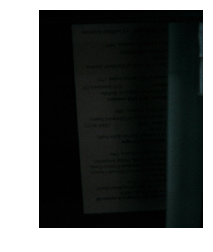

In [10]:
#debug
import matplotlib.pyplot as plt
%matplotlib inline
path = image_paths[4211]
img = cv2.imread(path)
db_sift = cv2.xfeatures2d.SIFT_create()
db_kpts = db_sift.detect(img)
db_kpts, db_des = db_sift.compute(img, kpts)
print(path,'\n',db_des)
plt.axis('off')
plt.imshow(img)